#### Notebook config

In [7]:
# %load ../../software/fullwavepy/fullwavepy/config/jupyter.py 
from arrau import *
from fullwavepy import * # Load modules imported in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook
# -----------------------------------------------------------------------------
# Set matplotlib backend
# -----------------------------------------------------------------------------
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# interactive plots displayed in a notebook cell
# %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# Set matplotlib style
# ----------------------------------------------------------------------------
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot', 'kmc_test'])
# print(plt.style.available) 
# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers and load the log_lvl function
from fullwavepy.config.logging import *
# -----------------------------------------------------------------------------
# Set level of log-messages
log_lvl(INFO) 
# Other options in order of increasing importance and 
# decreasing verbosity:
# TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50, respectively
# -----------------------------------------------------------------------------
# Autocompleting
# -----------------------------------------------------------------------------
#  Not sure if it works
%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 2

Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


Suppress printing logs except warnings and errors:

In [8]:
lll(40)

Set the path for projects accessible by the computational cluster:

In [9]:
path_eph = '/home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch08_Kolumbo_volcano'

Load the experiment's metadata:

In [10]:
xp = PROTEUS()
xp.read_all()

##### Test the `fullwavepy.seismic.data` package

In [12]:
!python3 -m unittest fullwavepy.seismic.test.test_data  -v

test_data_muter_susgy (fullwavepy.seismic.test.test_data.TestDataMuter) ... ok
test_extract (fullwavepy.seismic.test.test_data.TestDataSet) ... ok
test_get_files (fullwavepy.seismic.test.test_data.TestDataSet) ... ok
test_get_files_within_extent (fullwavepy.seismic.test.test_data.TestDataSet) ... ok
test_get_stations_within_extent (fullwavepy.seismic.test.test_data.TestDataSet) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.039s

OK


# Set up a project

Let us first set up a new project aiming to calculate synthetics simulating the field data.

We will first pre-process the data by trimming and resampling the traces, both done with `SegyPrep` - the default pre-processor of `fullwave3d`. This is most conveniently called from `fullwavepy`'s `Proj` framework class. Especially so as we will later use it to simulate the field data in order to pick the first breaks needed in defining the mute.

In [14]:
# path = path_eph
path = './'

Let us set the time-discretisation to $3000$ time samples, each $0.0025$ s long. Both numbers are different in the raw data, so the pre-processing will trim and resample the traces.

In [15]:
# project parameters 
exe = {'fullwave': '~/PhD/fullwave3D/rev690/bin/fullwave3D.exe',
       'segyprep': '/home/kmc3817/light_PhD/fullwave3D/segyprep_v3.16/bin/segyprep_v3.16'}
kwargs = dict(path=path, exe=exe, box=b01.box, dt=0.0025, ns=3000, dx=50, cat=0)

In [16]:
# init project  
lll(40)
syn = ProjSyn('data_syn', **kwargs, env={'SLAVES_WAVEFIELDSVTR': -100})

# Pre-process

We first create all the input and then run the `sp` pre-processor

In [21]:
%%time 
syn.i.tvp.prep(xp.svp)

CPU times: user 5.02 s, sys: 3.16 s, total: 8.18 s
Wall time: 23.6 s


In [18]:
syn.i.rsg.prep(xp.wvl)
syn.i.rse.prep(fnames=['../../%s' % i for i in ds.fnames])
syn.i.sp.prep(reciprocity=True, ztype='d')

Content of  .//data_syn//inp/data_syn-RawSeis.txt : 
../../b01_subset/MGL1521_S104_4_x8000_25000_y-3000_15000.sgy
../../b01_subset/MGL1521_S109_4_x8000_25000_y-3000_15000.sgy
../../b01_subset/MGL1521_S112_4_x8000_25000_y-3000_15000.sgy
../../b01_subset/MGL1521_S124_4_x8000_25000_y-3000_15000.sgy
../../b01_subset/MGL1521_S125_4_x8000_25000_y-3000_15000.sgy
../../b01_subset/MGL1521_S137_4_x8000_25000_y-3000_15000.sgy
../../b01_subset/MGL1521_S157_4_x8000_25000_y-3000_15000.sgy
../../b01_subset/MGL1521_S158_4_x8000_25000_y-3000_15000.sgy
../../b01_subset/MGL1521_S177_4_x8000_25000_y-3000_15000.sgy
../../b01_subset/MGL1521_S178_4_x8000_25000_y-3000_15000.sgy
../../b01_subset/MGL1521_W105_4_x8000_25000_y-3000_15000.sgy
../../b01_subset/MGL1521_W110_4_x8000_25000_y-3000_15000.sgy
../../b01_subset/MGL1521_W123_4_x8000_25000_y-3000_15000.sgy
../../b01_subset/MGL1521_W138_4_x8000_25000_y-3000_15000.sgy
../../b01_subset/MGL1521_W139_4_x8000_25000_y-3000_15000.sgy
../../b01_subset/MGL1521_W176_4_

In [19]:
%%time 
syn.i.sp.run()
syn.i.rnf.prep(b_abs=40, e_abs=50)


 SEGYPREP  -  Version 3.16.04                                                     
 ********

 Data preparation for 2D & 3D wavefield tomography

 Project name set to data_syn
 Preparing files for synthetics...

 Grid points in-line:                    341
 Grid points cross-line:                 361
 Grid points vertically:                  81
 Horiz grid spacing (metres):      50.0000000    
 Vert grid spacing (metres):       50.0000000    
 Model length (metres):            17000.0000    
 Model width (metres):             18000.0000    
 Model depth (metres):             4000.00000    

 Modelling time step (ms):         2.50000000    
 Output data delta-T (ms):         2.50000000    
 Output data length (ms):          7500.00000    
 Output data length (samples):          3000
 Time steps to model:                   3000

 Receiver-array fixed in space:          yes
 Renumber original channel numbers:       no
 Use FFID instead of SOURCE numbers:     yes
 FFID numbers are unique:

#### Fig.
Pre-processed data.

The `OutSeis` file contains all receiver gathers merged. To plot only one, we perform the windowing. Note that on the normalised plots the noise has been enhanced for the shorter traces (strong water waves excluded).

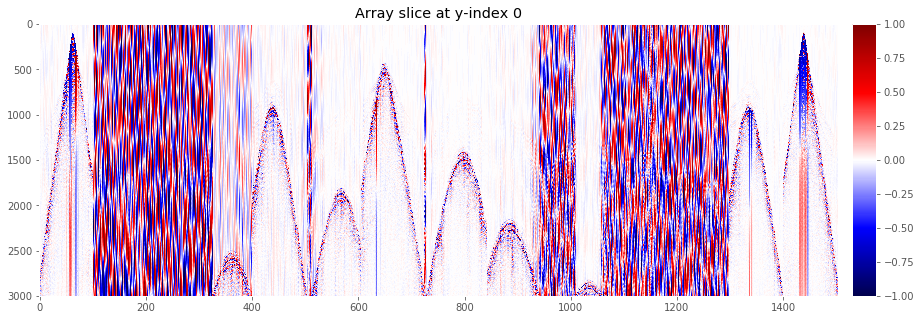

In [21]:
figure(15,5)
syn.i.ose.plot(win=dict(tracf=[4104]), norm='max')

# Filter

In [17]:
name = 'Ose.sgy'
path = './'
fname = path + name

In [23]:
%%time 
kw_filt = {'pad': 100, 'f1': 2, 'f2': 3, 'f3': 4.5, 'f4': 6.5, 'zerophase': False}
from fullwavepy.seismic.data import DataFileSgy
!cp {syn.i.ose.fname} {fname}
f = DataFileSgy(name, path)
f.filt(dt=0.0025,  **kw_filt)

CPU times: user 44 ms, sys: 48 ms, total: 92 ms
Wall time: 27.8 s


In [17]:
from fullwavepy.seismic.data import DataFileSgy
name = 'Ose.sgy'
path = './'
ose_filt = DataFileSgy(name, path)

#### Fig.
Before and after filtering

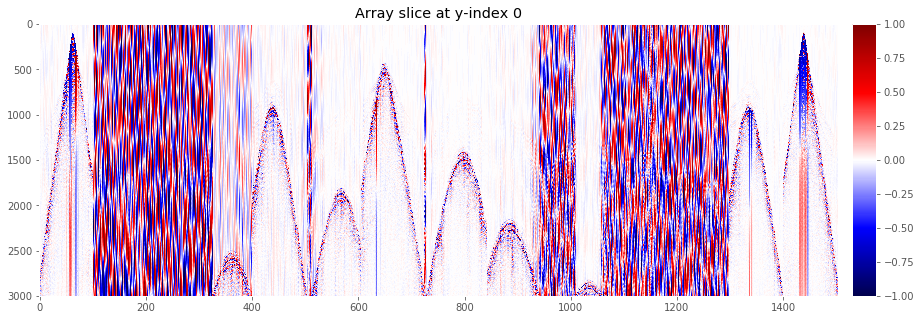

In [21]:
figure(15,5)
syn.i.ose.plot(win=dict(tracf=[4104]), norm='max')

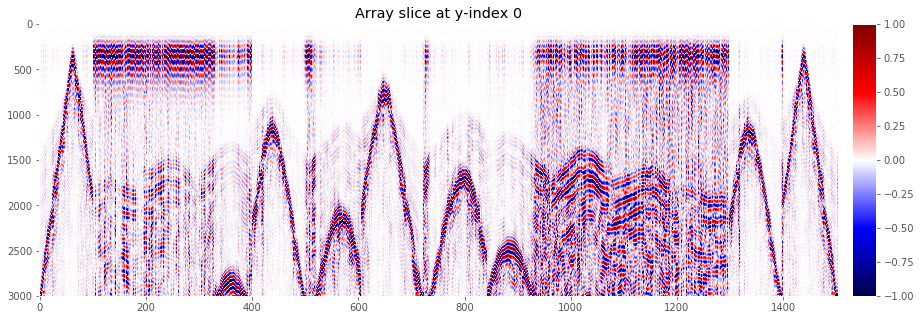

In [24]:
figure(15,5)
ose_filt.plot(win=dict(tracf=[4104]), norm='max')

# Calculate synthetics

File I/O on the RDS file system gets terribly slow, that's why it's sometimes much faster to first prepare input files locally (`path='./'`) and only then copy them to `cx1` with `rsync`.

### Run

In [49]:
# pbs scripts 
lll(20)
# just a test of cx1,
# p.i.pbs.no[0].prep(q='debug') 
# rev728 does not recognise Template?
# p.i.pbs.no[1].prep(q='debug') 
# all good now, ready for actual run
# p.i.pbs.no[2].prep(select=4, q='pqmrwarn')
# lost patience waiting in the queue
# p.i.pbs.no[3].prep(select=2, q='general')
# check which one will run first
# p.i.pbs.no[4].prep(select=2, q='pqmrwarn')
# Now with snapshots every 100 time-steps:
p.i.pbs.no[5].prep(select=2, q='pqmrwarn')
# p.i.rsync('my_eph') # send input from current path to `cx1` ephemeral

INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._set_resources: Queue selected: pqmrwarn
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: No. of shots in the runfile (ncomp): 16
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: mpiprocs not specified. It will be chosen to maximize a decimal part of nshots / (mpiprocs-1) for a given select=
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: Max. decimal place 0.8421052631578947 is for mpiprocs: 10 and ompthreads: 4
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: There are mpiprocs value(s) that give integer: nshots / (mpiprocs-1)
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: mpiprocs: 1, ompthreads: 40


Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch08_Kolumbo_volcano/data_s01//inp/data_s01-Run5.pbs : 
#!/bin/bash

##
# FULLWAVE3D WILL BE RUN FROM proj/out/
# For more explanation, see help(fullwavepy.project.files.runfiles.PbsFile).
#
##

#PBS -N data_s01
#PBS -o ../out/data_s01-JobOut5.log
#PBS -e ../out/data_s01-JobErr5.log
#PBS -l walltime=01:00:00
#PBS -l select=2:mpiprocs=1:ompthreads=40:ncpus=40:mem=128gb
#PBS -l place=scatter:excl

start=`date +%s`

    # PATHS
    code_path=~/PhD/fullwave3D/rev690/bin/fullwave3D.exe
    echo 'code_path: '${code_path}

    work_dir=$PBS_O_WORKDIR/../out/ # $PBS_O_WORKDIR IS THE ONE CONTAINING THIS SCRIPT
    
    # CAVEAT  
    rm $work_dir/data_s01-Runfile.key   
    rm $work_dir/data_s01-Ghost.*


    # HARD-LINK INPUT FILES TO OUTPUT DIR WHERE THE CODE WILL RUN
    ln $PBS_O_WORKDIR/* $work_dir
    
    # CHANGE DIRECTORY TO PROJECT OUTPUT
    cd $work_dir
    
    
# DISABLE PINNING OF THE PROCESSES (MAKE ALL NODE CORES AVAILABL

On `cx1` run:

In [18]:
# dir=my_ephemeral/PROJECTS/ch08_Kolumbo_volcano/; code=rev728; proj=data_s01; q=
# dir=$dir; code=$code; q=$q; projs=$(ls $dir | grep $proj); for proj in $projs; do echo $proj; fwi_qsub.sh $dir/$proj/ $proj $code $q; done

### Out

# Mute

Tuning the length of a time-window is discussed in `../07_Input_preparation/072_Observed_data.ipynb` 

### Extract first breaks

#### Alg.
Copy previously calculated synthetics from ephemeral. They were calculated for 2000 time steps but this should not matter. Note, this time project was initialised at `path_eph`.

In [28]:
%%time 
# !cp {p.o.syn.fname} ./data_s01/out
# !cp {p.o.syn.idx.fname} ./data_s01/out

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.77 µs


#### Alg.
Extract first breaks from synthetics. If already done, see the alternative below.

In [89]:
%%time 
fb = s01.o.syn.get_fbreaks()

CPU times: user 1min 50s, sys: 592 ms, total: 1min 51s
Wall time: 1min 55s


#### Alg.
Alternatively, read the first breaks from the text file.

In [19]:
from fullwavepy.ioapi.generic import read_txt
fb = read_txt('data_s01/out/data_s01-Synthetic_firstbreaks.txt')
fb = [float(i[0]) for i in fb]

Note that they are in samples, not seconds.

#### Alg.
Merge first breaks with the header metadata.

In [20]:
import pandas as pd
df = pd.read_csv('data_s01/out/data_s01-Synthetic_HEAD.csv')
df['fb'] = [int(i) for i in fb]

#### Fig.
Filtered data with first breaks.

In [21]:
tracf = 4104
from fullwavepy.seismic.data import DataGather
dg = DataGather(ose_filt.read(win=dict(tracf=[tracf]))[:,0,:])
dg.normalise()

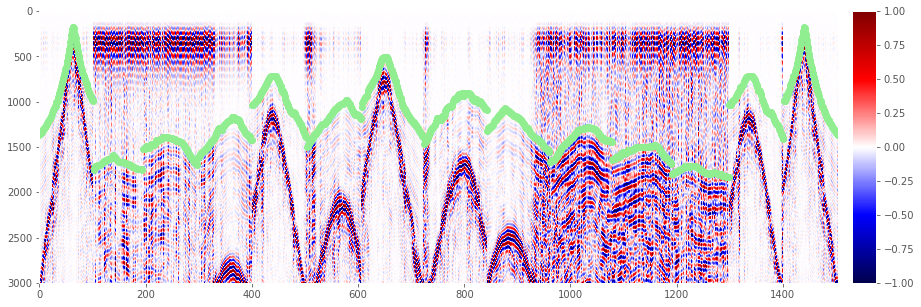

In [23]:
figure(15,5)
dg.plot(cmap='seismic', aspect='auto')
plt.plot(df.loc[df.tracf==tracf]['fb'], 'o', c='lightgreen')
plt.gca().invert_yaxis()

### Apply the mute

In [55]:
%%time 
from fullwavepy.seismic.data import DataMuterSUSGY, DataFileSgy
DataMuterSUSGY().mute(ose_filt.fname, tmute=np.array(fb)*syn.dt, twin=1.5)
ose_fm = DataFileSgy('Ose_muted.sgy', './')

CPU times: user 52 ms, sys: 12 ms, total: 64 ms
Wall time: 2.91 s


In [33]:
tracf = 4104

In [56]:
from fullwavepy.seismic.data import DataGather
dg = DataGather(ose_fm.read(win=dict(tracf=[tracf]))[:,0,:])
dg.normalise()

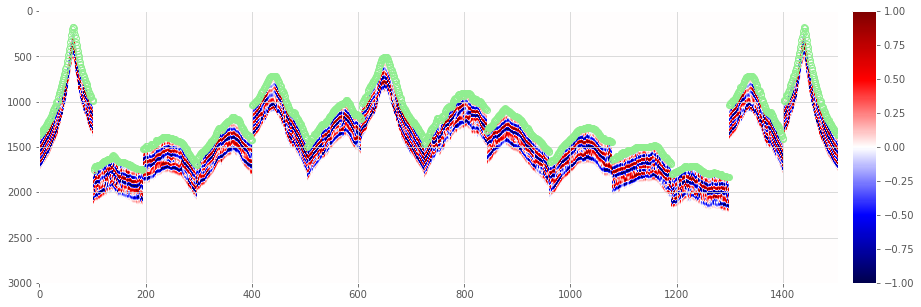

In [48]:
figure(15,5)
dg.plot(aspect='auto')
plt.plot(df.loc[df.tracf==tracf]['fb'], 'o', markeredgecolor='lightgreen', 
         markerfacecolor='none')
plt.grid(c='lightgrey')
# plt.xlim(0,20)
# plt.ylim(0,2e3)
plt.gca().invert_yaxis()

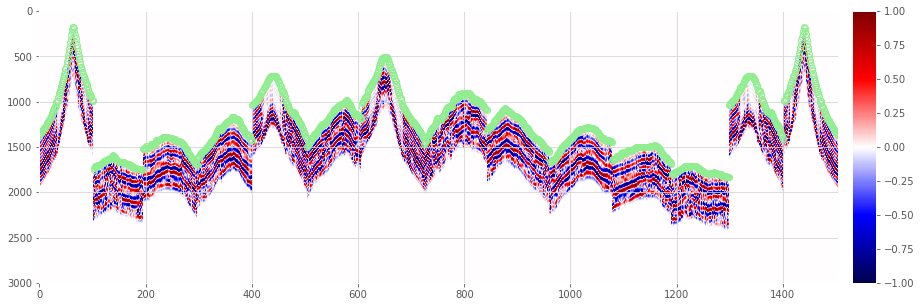

In [57]:
figure(15,5)
dg.plot(aspect='auto')
plt.plot(df.loc[df.tracf==tracf]['fb'], 'o', markeredgecolor='lightgreen', 
         markerfacecolor='none')
plt.grid(c='lightgrey')
# plt.xlim(0,20)
# plt.ylim(0,2e3)
plt.gca().invert_yaxis()

### Apply the mute to synthetics

In [59]:
name = 'data_s01-Synthetic.sgy'
path = './data_s01/out'
fname = path + name
s01_o_syn = DataFileSgy(name, path)

In [64]:
%%time 
from fullwavepy.seismic.data import DataMuterSUSGY, DataFileSgy
fname_out = 's01_o_syn_muted.sgy'
DataMuterSUSGY().mute(s01_o_syn.fname, tmute=np.array(fb)*syn.dt, twin=1, fname_out=fname_out)
s01_o_syn_m = DataFileSgy(fname_out, './')

CPU times: user 64 ms, sys: 12 ms, total: 76 ms
Wall time: 2.29 s


In [65]:
tracf = 4104

In [66]:
from fullwavepy.seismic.data import DataGather
dg = DataGather(s01_o_syn_m.read(win=dict(tracf=[tracf]))[:,0,:])
dg.normalise()

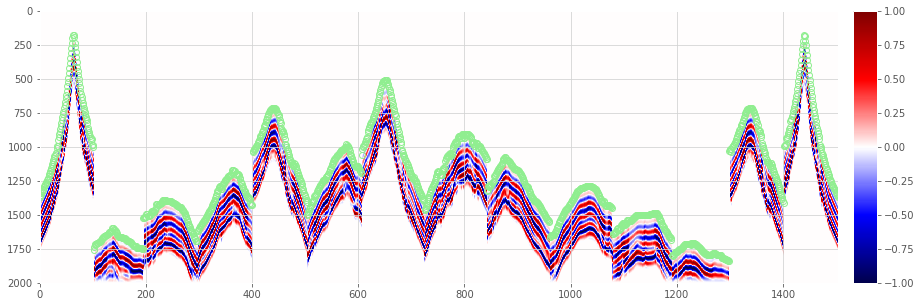

In [67]:
figure(15,5)
dg.plot(aspect='auto')
plt.plot(df.loc[df.tracf==tracf]['fb'], 'o', markeredgecolor='lightgreen', 
         markerfacecolor='none')
plt.grid(c='lightgrey')
# plt.xlim(0,20)
# plt.ylim(0,2e3)
plt.gca().invert_yaxis()

# ...